In [22]:
# pip install mpld3

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Krishna' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import nltk
import pandas as pd
import numpy as np

%matplotlib inline
# import mpld3
# mpld3.enable_notebook()
import matplotlib.pyplot as plt
import string
from nltk.tokenize import TweetTokenizer

from sklearn.preprocessing import Normalizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

from collections import Counter

In [2]:
# path = "../Pre-Processing/"

In [3]:
# data = pd.read_csv(path+'Pre_Processed_Data.csv')
# data_without_stemming = pd.read_csv(path+'Pre_Processed_Data_without_stemming.csv')

# # data
# data = data_without_stemming
# data

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,"['zero-shot', 'learning', 'problem', 'learning..."
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"['current', 'world', 'major', 'focus', 'design..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,"['rapid', 'increase', 'population', 'decline',..."
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,"['internet', 'things', 'iot', 'prominent', 'te..."
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,"['thesis', 'presents', 'nonlinear', 'optical',..."
...,...,...,...,...,...,...,...,...
17979,17979,1-Jun-1963,NUCLEAR MAGNETIC RESONANCE SPECTRA OF SOME SUB...,"Aruldhas, G","Venkateswarlu, Putcha",PH.D.,PHY,['abstract']
17980,17980,5-May-1963,CONTRIBUTIONS TO TWO-DIMENSIONAL INCLUSION PRO...,"Radha, Krishna","Bhargava, R D",PH.D.,MATH & STATS,['abstract']
17981,17981,4-May-1963,A STUDY IN INTEGRAL FUNCTION AND THEIR DERIVAT...,"Gupta, Jagdish Saran","Srivastava, R S L",PH.D.,MATH & STATS,['abstract']
17982,17982,21-Dec- 18,"Modeling, hardware-in-the-loop simulation and ...","Setu, Sagar",Abhishek,PH.D.,AE,"['unmanned', 'aerial', 'vehicle', 'uavs', 'tod..."


### deleting entries in which Departments are not  mentioned

In [4]:
# data = data[data['Department']!='-'].reset_index(drop=True)
# data

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,"['zero-shot', 'learning', 'problem', 'learning..."
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"['current', 'world', 'major', 'focus', 'design..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,"['rapid', 'increase', 'population', 'decline',..."
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,"['internet', 'things', 'iot', 'prominent', 'te..."
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,"['thesis', 'presents', 'nonlinear', 'optical',..."
...,...,...,...,...,...,...,...,...
17976,17979,1-Jun-1963,NUCLEAR MAGNETIC RESONANCE SPECTRA OF SOME SUB...,"Aruldhas, G","Venkateswarlu, Putcha",PH.D.,PHY,['abstract']
17977,17980,5-May-1963,CONTRIBUTIONS TO TWO-DIMENSIONAL INCLUSION PRO...,"Radha, Krishna","Bhargava, R D",PH.D.,MATH & STATS,['abstract']
17978,17981,4-May-1963,A STUDY IN INTEGRAL FUNCTION AND THEIR DERIVAT...,"Gupta, Jagdish Saran","Srivastava, R S L",PH.D.,MATH & STATS,['abstract']
17979,17982,21-Dec- 18,"Modeling, hardware-in-the-loop simulation and ...","Setu, Sagar",Abhishek,PH.D.,AE,"['unmanned', 'aerial', 'vehicle', 'uavs', 'tod..."


### Taking Top 30 values from tf-idf vectorization --  importing data

In [2]:
data = pd.read_csv('Data_topn.csv')
data = data.rename(columns={'Abstract_Topn':'Abstract'})
data

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,"['class', 'learning', 'generative', 'shot', 'd..."
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"['material', 'recrystallization', 'ductility',..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,"['soil', 'nir', 'nutrient', 'fertilizer', 'dev..."
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,"['sensor', 'fusion', 'constraint', 'snr', 'tec..."
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,"['nonlinear', 'methanol', 'laser', 'beam', 'op..."
...,...,...,...,...,...,...,...,...
17288,17288,25-Apr-1964,CONTRIBUTIONS TO HYDRODYNAMIC AND HYDROMAGNETI...,"Shukla, J B","Kapur, J N",PH.D.,MATH & STATS,"['lubricant', 'bearing', 'conducting', 'fluid'..."
17289,17289,25-Feb-1964,"STEADY AND UNSTEADY FLOWS OF NEWTONIAN, NON-NE...","Srivastava, P N","Kapur, J N",PH.D.,MATH & STATS,"['fluid', 'viscoelastic', 'newtonian', 'steady..."
17290,17290,29-Dec-1963,CONTINUOUS WAVE NON-LINEAR OPTICAL STUDIES IN ...,"Rao, K Divakara","Sharma, K K",PH.D.,PHY,"['dye', 'chapter', 'grating', 'laser', 'doped'..."
17291,17291,21-Dec- 18,"Modeling, hardware-in-the-loop simulation and ...","Setu, Sagar",Abhishek,PH.D.,AE,"['flight', 'uav', 'controller', 'hils', 'helic..."


### Importing data is complete and the common part of the code starts

In [3]:
data

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,"['class', 'learning', 'generative', 'shot', 'd..."
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"['material', 'recrystallization', 'ductility',..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,"['soil', 'nir', 'nutrient', 'fertilizer', 'dev..."
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,"['sensor', 'fusion', 'constraint', 'snr', 'tec..."
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,"['nonlinear', 'methanol', 'laser', 'beam', 'op..."
...,...,...,...,...,...,...,...,...
17288,17288,25-Apr-1964,CONTRIBUTIONS TO HYDRODYNAMIC AND HYDROMAGNETI...,"Shukla, J B","Kapur, J N",PH.D.,MATH & STATS,"['lubricant', 'bearing', 'conducting', 'fluid'..."
17289,17289,25-Feb-1964,"STEADY AND UNSTEADY FLOWS OF NEWTONIAN, NON-NE...","Srivastava, P N","Kapur, J N",PH.D.,MATH & STATS,"['fluid', 'viscoelastic', 'newtonian', 'steady..."
17290,17290,29-Dec-1963,CONTINUOUS WAVE NON-LINEAR OPTICAL STUDIES IN ...,"Rao, K Divakara","Sharma, K K",PH.D.,PHY,"['dye', 'chapter', 'grating', 'laser', 'doped'..."
17291,17291,21-Dec- 18,"Modeling, hardware-in-the-loop simulation and ...","Setu, Sagar",Abhishek,PH.D.,AE,"['flight', 'uav', 'controller', 'hils', 'helic..."


In [4]:
count = CountVectorizer()
# count = CountVectorizer(max_features=500)
counts = count.fit_transform(data['Abstract'])
counts

<17293x76131 sparse matrix of type '<class 'numpy.int64'>'
	with 517361 stored elements in Compressed Sparse Row format>

In [5]:
counts.shape

(17293, 76131)

In [6]:
count.get_feature_names()

['aa',
 'aaa',
 'aab',
 'aac',
 'aacfs',
 'aachen',
 'aad',
 'aadt',
 'aag',
 'aahp',
 'aal',
 'aalap',
 'aalb',
 'aam',
 'aamic',
 'aamir',
 'aams',
 'aan',
 'aao',
 'aap',
 'aaqms',
 'aarogyasri',
 'aaroh',
 'aaronson',
 'aasho',
 'aatp',
 'aav',
 'ab',
 'aba',
 'abab',
 'abacus',
 'abandon',
 'abandoned',
 'abandonment',
 'abandwidth',
 'abank',
 'abanyan',
 'abaqus',
 'abase',
 'abastract',
 'abatement',
 'abatementprogrammes',
 'abb',
 'abba',
 'abbe',
 'abbott',
 'abbreviate',
 'abbreviated',
 'abbreviating',
 'abbreviation',
 'abc',
 'abcd',
 'abd',
 'abdomen',
 'abdominal',
 'abduction',
 'abductive',
 'abductor',
 'abe',
 'abeb',
 'abehavioral',
 'abel',
 'abeli',
 'abelian',
 'abelin',
 'aber',
 'aberrant',
 'aberration',
 'abetted',
 'abettercoke',
 'abf',
 'abhava',
 'abhinavagupta',
 'abhor',
 'abi',
 'abiad',
 'abietate',
 'abietic',
 'abilinear',
 'abilit',
 'ability',
 'abinary',
 'abiotic',
 'abiotically',
 'abituminous',
 'abl',
 'ablanking',
 'ablate',
 'ablated',
 '

In [7]:
tfidftransformer = TfidfTransformer()
transformed_matrix = tfidftransformer.fit_transform(counts)
transformed_matrix

<17293x76131 sparse matrix of type '<class 'numpy.float64'>'
	with 517361 stored elements in Compressed Sparse Row format>

In [8]:
print(transformed_matrix)

  (0, 75934)	0.16329695422744686
  (0, 71516)	0.2240177163994079
  (0, 69121)	0.15868154235333448
  (0, 63430)	0.21303873885451552
  (0, 60712)	0.20205976130962316
  (0, 59936)	0.21984370285666457
  (0, 59570)	0.16282189835248712
  (0, 59142)	0.19581775917218996
  (0, 58221)	0.17785741641277902
  (0, 51685)	0.10197432876975208
  (0, 51592)	0.2289545265908699
  (0, 47995)	0.17955031077451436
  (0, 43906)	0.16743105989217424
  (0, 42441)	0.1477025648084421
  (0, 39233)	0.19745932178332512
  (0, 36019)	0.14600558851554168
  (0, 31304)	0.24278640247989547
  (0, 26258)	0.20012483190323896
  (0, 25210)	0.14587935290073992
  (0, 23012)	0.1679951946788687
  (0, 22714)	0.21622800786381266
  (0, 22643)	0.1848387816272976
  (0, 18266)	0.12975447153593192
  (0, 15740)	0.168571333229622
  (0, 15242)	0.10859504323904179
  :	:
  (17292, 61852)	0.12184268785679199
  (17292, 60528)	0.11048207485912355
  (17292, 58645)	0.19739595632941195
  (17292, 57237)	0.20607168971610684
  (17292, 54941)	0.146724442

### Visualizing Features - Using tsne

In [9]:
transformed_matrix

<17293x76131 sparse matrix of type '<class 'numpy.float64'>'
	with 517361 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.manifold import TSNE

In [11]:
%%time
tsne = TSNE(init='random', random_state=0)

reduced_features= tsne.fit_transform(transformed_matrix)

print(reduced_features)
print(reduced_features.shape)

[[ 34.299835  31.345182]
 [-20.96697  -44.249928]
 [-22.273958  66.12227 ]
 ...
 [ 30.48413  -32.95657 ]
 [-12.712366  21.289639]
 [-59.969227 -16.387066]]
(17293, 2)
Wall time: 1min 32s


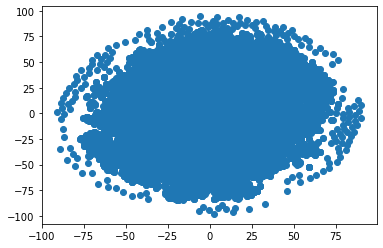

In [12]:
plt.scatter(reduced_features[:,0], reduced_features[:,1])
plt.show()

In [13]:
%%time
kmeans = KMeans(n_clusters = 50,init='k-means++', random_state=0)
# kmeans.fit(reduced_features)
# kmeans.fit(transformed_matrix)
predicted = kmeans.fit_transform(reduced_features)

centers = kmeans.cluster_centers_
# predicted

Wall time: 2.55 s


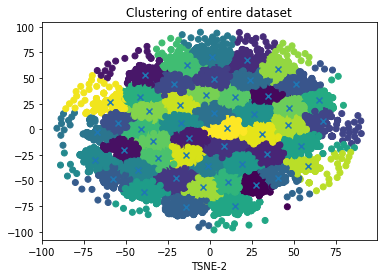

In [14]:
# print(kmeans.labels_)
# print(centers.shape)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.xlabel('TSNE-1')
plt.xlabel('TSNE-2')
plt.title('Clustering of entire dataset')
plt.show()

Text(0.5, 1.0, 'No of Articles in each cluster')

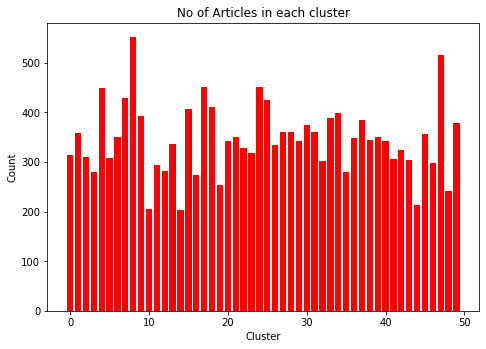

In [15]:
labels = kmeans.labels_
labels = labels.tolist()
temp = Counter(labels)
# temp

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(50):
    ax.bar(i, temp[i], color='r')
# plt.show()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('No of Articles in each cluster')

In [16]:
len(kmeans.labels_)
labels = kmeans.labels_
# labels = labels[labels == 0]
len(labels)

cluster1 = np.where(labels == 0)
cluster1

# np.unique(labels)

(array([    6,    50,   251,   271,   462,   490,   541,   715,   758,
          772,   925,   990,  1036,  1038,  1068,  1105,  1124,  1126,
         1138,  1191,  1262,  1334,  1359,  1362,  1366,  1438,  1460,
         1479,  1522,  1554,  1572,  1625,  1648,  1661,  1692,  1742,
         1754,  1871,  1879,  1927,  1964,  1976,  1982,  2034,  2069,
         2174,  2223,  2260,  2300,  2307,  2331,  2365,  2393,  2477,
         2480,  2481,  2519,  2526,  2538,  2540,  2578,  2593,  2599,
         2735,  2740,  2765,  2794,  2813,  2857,  3037,  3077,  3084,
         3086,  3155,  3186,  3210,  3220,  3253,  3265,  3409,  3468,
         3478,  3557,  3599,  3602,  3792,  3838,  3842,  3845,  3898,
         3899,  3911,  3912,  3922,  3936,  3948,  3955,  4091,  4130,
         4134,  4144,  4213,  4220,  4261,  4632,  4633,  4677,  4690,
         4703,  4725,  4733,  4793,  4799,  4820,  5011,  5019,  5068,
         5079,  5084,  5088,  5113,  5120,  5170,  5218,  5552,  5689,
      

kmeans.n_iter_

### Visualization using UMAP


In [23]:
import umap


umap_model = umap.UMAP(random_state=0)
reduced_features= umap_model.fit_transform(transformed_matrix)

print(reduced_features.shape)

(17981, 2)


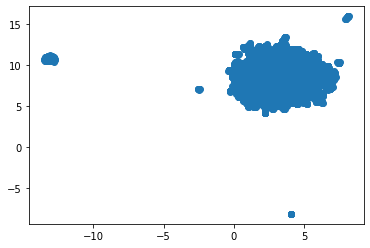

In [24]:
plt.scatter(reduced_features[:,0], reduced_features[:,1])
plt.show()

In [25]:
%%time
kmeans = KMeans(n_clusters = 45,init='k-means++')
kmeans.fit(reduced_features)
centers = kmeans.cluster_centers_
# centers

Wall time: 1.96 s


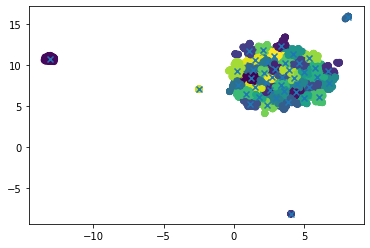

In [26]:
# print(kmeans.labels_)
# print(centers.shape)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.show()